MNIST Classifier Demo
This notebook demonstrates the implementation of three different MNIST classifiers using a common interface:
1. Random Forest (RF)
2. Feed-Forward Neural Network (NN)
3. Convolutional Neural Network (CNN)
All classifiers implement the same interface and are accessible through a unified MnistClassifier class.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# Import our implementations
from src.data_loader import load_mnist_data
from src.mnist_classifier import MnistClassifier


In [2]:
# Load and Explore the MNIST Dataset
X_train, X_test, y_train, y_test = load_mnist_data(test_size=0.2)

print("MNIST dataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")



MNIST dataset shapes:
X_train: (56000, 784)
y_train: (56000,)
X_test: (14000, 784)
y_test: (14000,)


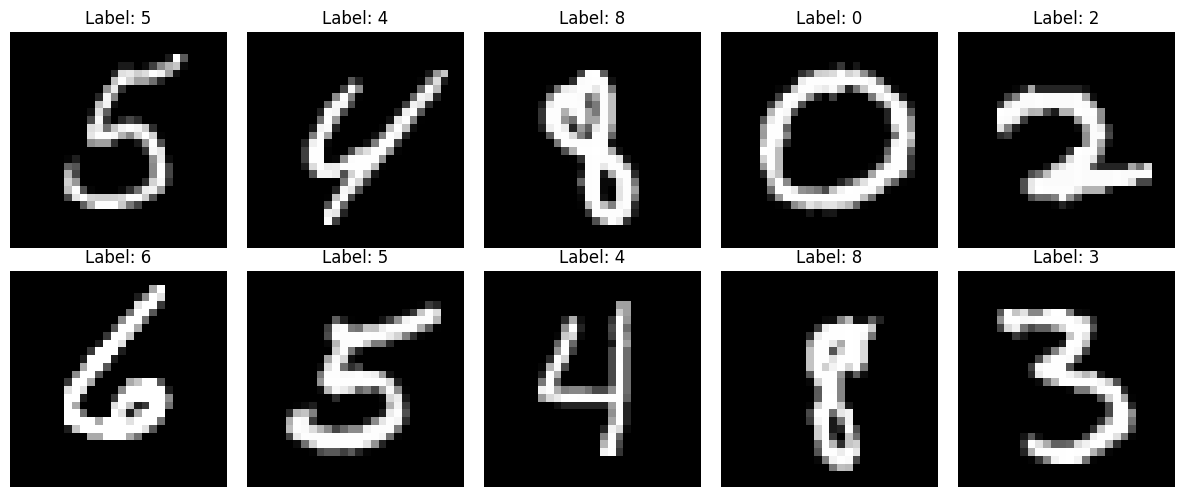

In [3]:
# Convert both to numpy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Reshape images
X_train_images = X_train_np.reshape(-1, 28, 28)

# Plot
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_images[i], cmap='gray')
    plt.title(f"Label: {y_train_np[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:

def train_and_evaluate(algorithm, X_train, y_train, X_test, y_test, sample_size=None):
   
   # Use a subset of data if specified
   if sample_size is not None:
       X_train_sample = X_train[:sample_size]
       y_train_sample = y_train[:sample_size]
   else:
       X_train_sample = X_train
       y_train_sample = y_train
   
  
   classifier = MnistClassifier(algorithm=algorithm)
   

   print(f"Training {algorithm.upper()} classifier on {len(X_train_sample)} samples...")
   start_time = time.time()
   classifier.train(X_train_sample, y_train_sample)
   training_time = time.time() - start_time
   print(f"Training time: {training_time:.4f} seconds")
   

   print("Making predictions...")
   start_time = time.time()
   predictions = classifier.predict(X_test)
   prediction_time = time.time() - start_time
   print(f"Prediction time: {prediction_time:.4f} seconds")
   

   accuracy = accuracy_score(y_test, predictions)
   print(f"Accuracy: {accuracy:.4f}")
   
   return classifier, predictions, {
       'training_time': training_time,
       'prediction_time': prediction_time,
       'accuracy': accuracy
   }

def visualize_confusion_matrix(y_true, y_pred, title):
 
   cm = confusion_matrix(y_true, y_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
   plt.title(title)
   plt.ylabel('True Label')
   plt.xlabel('Predicted Label')
   plt.show()

def visualize_predictions(X, y_true, y_pred, title, num_samples=10):

    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    if hasattr(y_true, 'to_numpy'):
        y_true = y_true.to_numpy()
    if hasattr(y_pred, 'to_numpy'):
        y_pred = y_pred.to_numpy()
        
    # Reshape if needed (for image display)
    if len(X.shape) == 2 and X.shape[1] == 784:  # Flattened images
        X = X.reshape(-1, 28, 28)
        
   
    incorrect_indices = np.where(y_true != y_pred)[0]
    
    
    if len(incorrect_indices) > 0:
        samples = min(num_samples, len(incorrect_indices))
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"{title} - Incorrect Predictions", fontsize=14)
        
        for i in range(samples):
            idx = incorrect_indices[i]
            plt.subplot(1, samples, i+1)
            plt.imshow(X[idx], cmap='gray')
            plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("All predictions are correct!")



Loaded model from models/random_forest_mnist.joblib
Training RF classifier on 5000 samples...
Model saved to models/random_forest_mnist.joblib
Training time: 2.8725 seconds
Making predictions...
Prediction time: 0.3697 seconds
Accuracy: 0.9309

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.95      0.98      0.96      1600
           2       0.92      0.93      0.92      1380
           3       0.91      0.91      0.91      1433
           4       0.93      0.92      0.93      1295
           5       0.93      0.91      0.92      1273
           6       0.94      0.96      0.95      1396
           7       0.93      0.92      0.93      1503
           8       0.93      0.90      0.91      1357
           9       0.88      0.91      0.90      1420

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93     

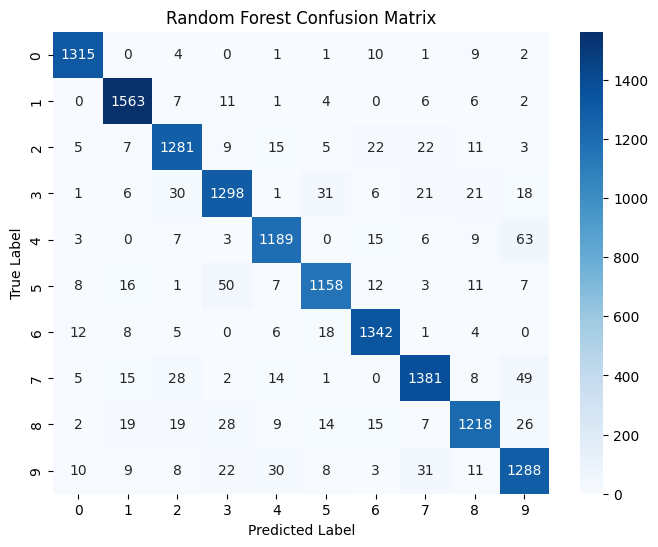

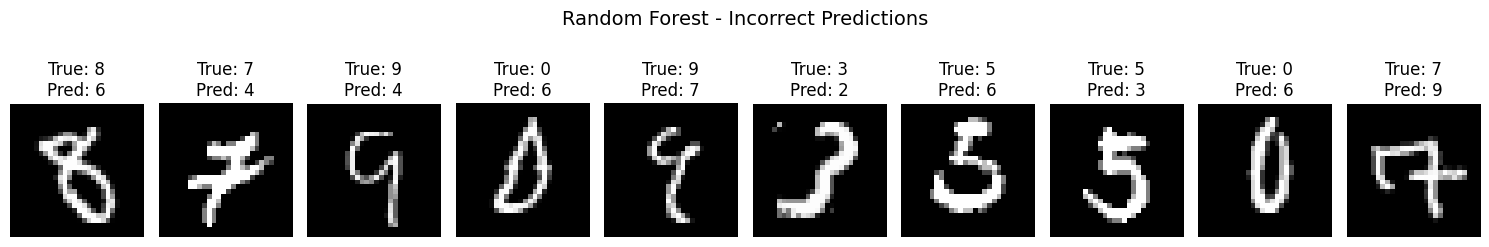

In [5]:
# Testing Random Forest Classifier
# Use a smaller subset for RF to save time
rf_classifier, rf_predictions, rf_metrics = train_and_evaluate(
   'rf', X_train, y_train, X_test, y_test, sample_size=5000
)

print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


visualize_confusion_matrix(y_test, rf_predictions, "Random Forest Confusion Matrix")


visualize_predictions(X_test, y_test, rf_predictions, "Random Forest")




Loaded model from models/feedforward_mnist_model.pt
Loaded model from models/feedforward_mnist_model.pt
Training NN classifier on 10000 samples...
Model saved to models/feedforward_mnist_model.pt
Training time: 20.8765 seconds
Making predictions...
Prediction time: 0.1027 seconds
Accuracy: 0.9343

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1343
           1       0.96      0.98      0.97      1600
           2       0.92      0.92      0.92      1380
           3       0.95      0.89      0.92      1433
           4       0.94      0.92      0.93      1295
           5       0.93      0.93      0.93      1273
           6       0.95      0.97      0.96      1396
           7       0.87      0.98      0.92      1503
           8       0.92      0.92      0.92      1357
           9       0.94      0.87      0.90      1420

    accuracy                           0.93     14000
   macro avg       0.94     

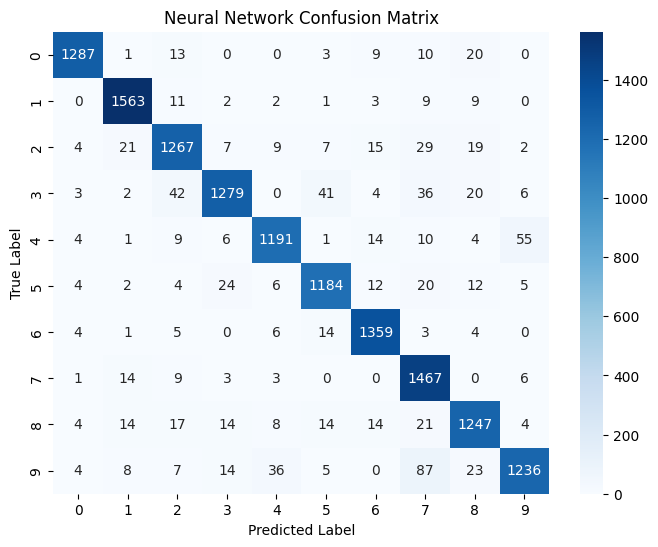

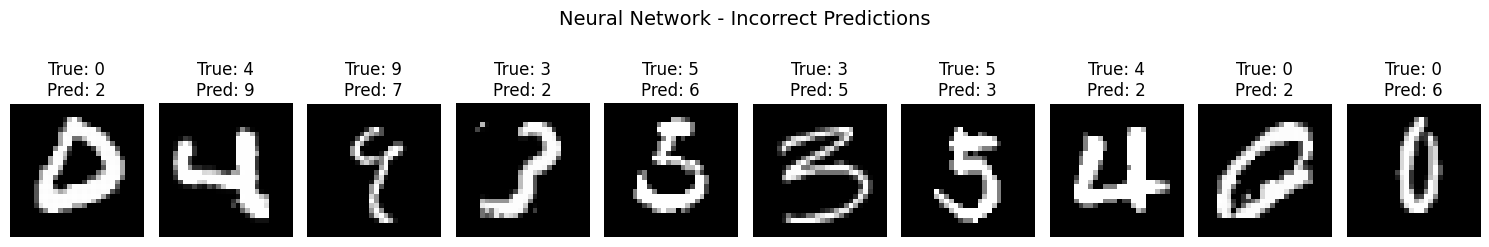

In [6]:
# Testing Neural Network Classifier
# Use smaller subset and fewer epochs for the demo
nn_classifier = MnistClassifier(algorithm='nn')
nn_classifier.classifier.epochs = 3  # Reduce epochs for the demo

nn_classifier, nn_predictions, nn_metrics = train_and_evaluate(
   'nn', X_train, y_train, X_test, y_test, sample_size=10000
)

print("\nClassification Report:")
print(classification_report(y_test, nn_predictions))


visualize_confusion_matrix(y_test, nn_predictions, "Neural Network Confusion Matrix")


visualize_predictions(X_test, y_test, nn_predictions, "Neural Network")


Loaded model from models/cnn_mnist_model.pt
Loaded model from models/cnn_mnist_model.pt
Training CNN classifier on 5 samples...
Model saved to models/cnn_mnist_model.pt
Training time: 1.6342 seconds
Making predictions...
Prediction time: 37.5176 seconds
Accuracy: 0.9912

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1343
           1       0.99      1.00      0.99      1600
           2       1.00      0.98      0.99      1380
           3       1.00      1.00      1.00      1433
           4       0.99      1.00      0.99      1295
           5       1.00      0.99      0.99      1273
           6       0.99      1.00      0.99      1396
           7       0.98      1.00      0.99      1503
           8       0.99      0.99      0.99      1357
           9       0.99      0.98      0.99      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
w

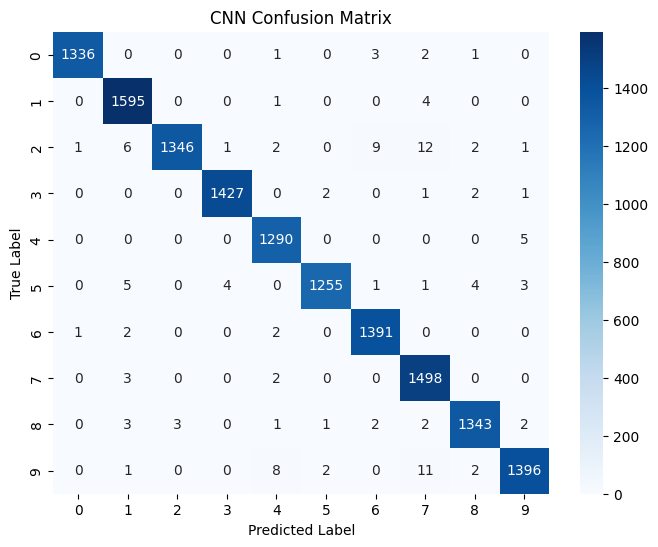

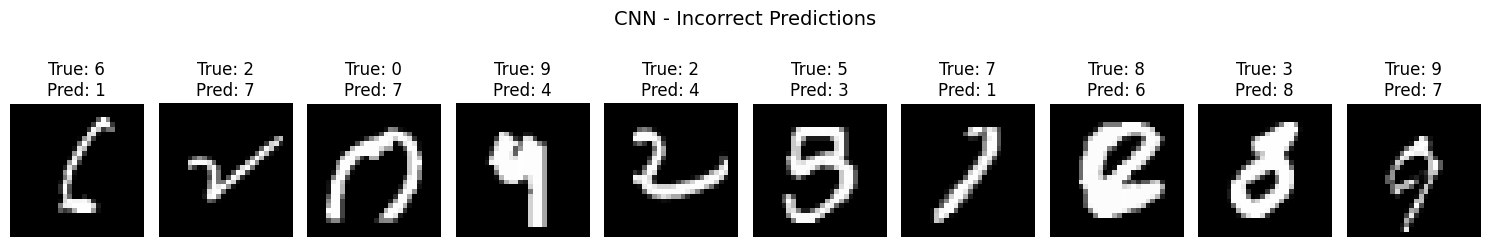

In [7]:
# Testing CNN Classifier
# Use smaller subset and fewer epochs for the demo
cnn_classifier = MnistClassifier(algorithm='cnn')
cnn_classifier.classifier.epochs = 3  # Reduce epochs for the demo

cnn_classifier, cnn_predictions, cnn_metrics = train_and_evaluate(
   'cnn', X_train, y_train, X_test, y_test, sample_size=5
)

print("\nClassification Report:")
print(classification_report(y_test, cnn_predictions))


visualize_confusion_matrix(y_test, cnn_predictions, "CNN Confusion Matrix")


visualize_predictions(X_test, y_test, cnn_predictions, "CNN")




Compare All Models

In [8]:

results = {
   'RF': rf_metrics,
   'NN': nn_metrics,
   'CNN': cnn_metrics
}

# Create comparison table
results_df = pd.DataFrame(results).T
results_df = results_df.rename(columns={
   'training_time': 'Training Time (s)',
   'prediction_time': 'Prediction Time (s)',
   'accuracy': 'Accuracy'
})
print(results_df)

     Training Time (s)  Prediction Time (s)  Accuracy
RF            2.872537             0.369654  0.930929
NN           20.876534             0.102698  0.934286
CNN           1.634175            37.517630  0.991214
